In [ ]:
pip install -U spacy


SyntaxError: ignored

In [ ]:
import pandas as pd

In [ ]:
!python -m spacy download en

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-21 17:48:24.616618: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# for manipulating dataframes
import pandas as pd
# for natural language processing: named entity recognition
import spacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
# for visualizations
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
df = pd.read_csv('medium_Data.csv')

In [ ]:
df.head()

,Titles,Authors,Dates,Links,Contents
0,Please Consider the Racial Impact of Your Hall...,Savala Nolan,Oct 17,https://momentum.medium.com/i-beg-you-consider...,"Oh, it’s that time of year again! So here is a..."
1,That Time We Burned Down Players’ Houses in Ul...,Tim Cotten,Oct 3,https://blog.cotten.io/that-time-we-burned-dow...,Ultima Online is celebrating its 25th annivers...
2,The Wonderful Outcome of the Ice Bucket Challenge,Jamie Cohen,Sep 30,https://newanddigital.medium.com/the-long-payo...,The water had to be ice cold and you had to be...
3,Why Should You Care About the Bar Exam?,Dan Canon,Sep 27,https://medium.com/i-taught-the-law/why-should...,You didn’t take the bar exam. That’s probably ...
4,Please Don’t Tell My Daughter She’s Beautiful,Kerala Taylor,Oct 11,https://keralataylor.medium.com/please-dont-te...,I have two beautiful children.I might be biase...


In [ ]:
stop

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [ ]:
df['tweet_without_stopwords'] = df['Titles'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop) ]))
df['tweet_without_stopwords'] = df['Titles'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop) ]))


In [ ]:
df.head()

,Titles,Authors,Dates,Links,Contents,tweet_without_stopwords
0,Please Consider Racial Impact Your Halloween...,Savala Nolan,Oct 17,https://momentum.medium.com/-beg--consider--ha...,"Oh, ’s time year ! So PSA remind Hal...",Consider Racial Impact Halloween Decor
1,That Time We Burned Down Players’ Houses Ulti...,Tim Cotten,Oct 3,https://blog.cotten.io/-time--burned--players-...,Ultima Online celebrating 25th anniversary! ...,Time Burned Players’ Houses Ultima Online
2,The Wonderful Outcome Ice Bucket Challenge,Jamie Cohen,Sep 30,https://newanddigital.medium.com/-long-payoff-...,The water ice cold recorded doing stu...,Wonderful Outcome Ice Bucket Challenge
3,Why Should You Care About Bar Exam?,Dan Canon,Sep 27,https://medium.com/-taught--law/---care---bar-...,You didn’t bar exam. That’s probably didn’...,Care Bar Exam?
4,Please Don’t Tell My Daughter She’s Beautiful,Kerala Taylor,Oct 11,https://keralataylor.medium.com/-dont-tell--da...,"I beautiful children.I biased, yes, neutr...",Don’t Tell Daughter She’s Beautiful


In [ ]:
tokens = nlp(''.join(str(df.Contents.tolist())))

In [ ]:
items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

[('Federer', 132),
 ('Twitter', 86),
 ('years', 71),
 ('today', 68),
 ('second', 59),
 ('TikTok', 50),
 ('One', 49),
 ('American', 46),
 ('Russia', 46),
 ('Ukraine', 43),
 ('Genre', 40),
 ('Netflix', 37),
 ('Dropbox', 37),
 ('year', 34),
 ('U.S.', 34),
 ('Jeffrey Dahmer', 34),
 ('Mastodon', 33),
 ('Meta', 33),
 ('Iran', 32),
 ('Google', 31)]

In [ ]:
person_list = []
for ent in tokens.ents:
    if ent.label_ == 'PERSON':
        person_list.append(ent.text)
        
person_counts = Counter(person_list).most_common(20)
df_person = pd.DataFrame(person_counts, columns =['text', 'count'])

In [ ]:
df_person.head()

,text,count
0,Twitter,51
1,Genre,40
2,Jeffrey Dahmer,34
3,Putin,28
4,Jon,21


In [ ]:
norp_list = []
for ent in tokens.ents:
    if ent.label_ == 'NORP':
        norp_list.append(ent.text)
        
norp_counts = Counter(norp_list).most_common(20)
df_norp = pd.DataFrame(norp_counts, columns =['text', 'count'])

In [ ]:
df_norp=pd.DataFrame(df_norp)
df_person=pd.DataFrame(df_person)

In [ ]:
df = pd.concat([df_person,df_norp])

In [ ]:
df_norp.head()

,text,count
0,American,46
1,Americans,30
2,Russian,24
3,Chinese,16
4,Iranian,16


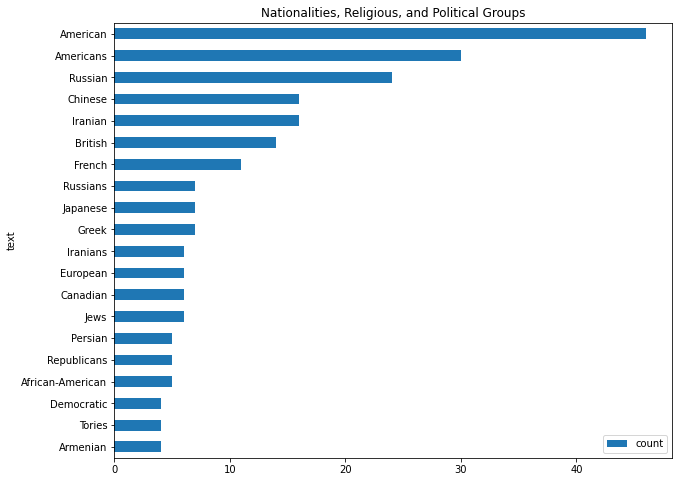

In [ ]:
df_norp.plot.barh(x='text', y='count', title="Nationalities, Religious, and Political Groups", figsize=(10,8)).invert_yaxis()